In [ ]:
pip install music21


In [ ]:
pip install fluidsynth


  Preparing metadata (setup.py) ... done
  Created wheel for fluidsynth: filename=fluidsynth-0.2-py3-none-any.whl size=4487 sha256=d444b6c916205e7cae6ebb3df5ef6af1cc5ab4f04fa24e5aa4e7922e50656f6b
  Stored in directory: /root/.cache/pip/wheels/72/5a/bf/347b142f199fb1bea87f16f8970916226951bc359c947ba19b
Successfully built fluidsynth


In [ ]:
pip install pydub

In [ ]:
pip install timidity


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp310-cp310-linux_x86_64.whl size=2054404 sha256=6ca8f892d685594007d13e534381fb286e92ba52bd2d396dc14635a3c8189d7c
  Stored in directory: /root/.cache/pip/wheels/10/70/ed/8c41675109565c2c65c3ac40d20859fc9d3f93a8efbb11d1c7
Successfully built simpleaudio


In [ ]:
pip install matplotlib


In [ ]:
def plot_fitness_history(fitness_history):
    plt.plot(range(1, len(fitness_history) + 1), fitness_history, marker='o')
    plt.title('Fitness ao longo das gerações')
    plt.xlabel('Geração')
    plt.ylabel('Fitness')
    plt.show()


Melhor sequência de acordes para G: ['Em', 'Bm', 'C', 'F#m7(b5)', 'Am', 'D', 'G']
Melhor fitness: 7


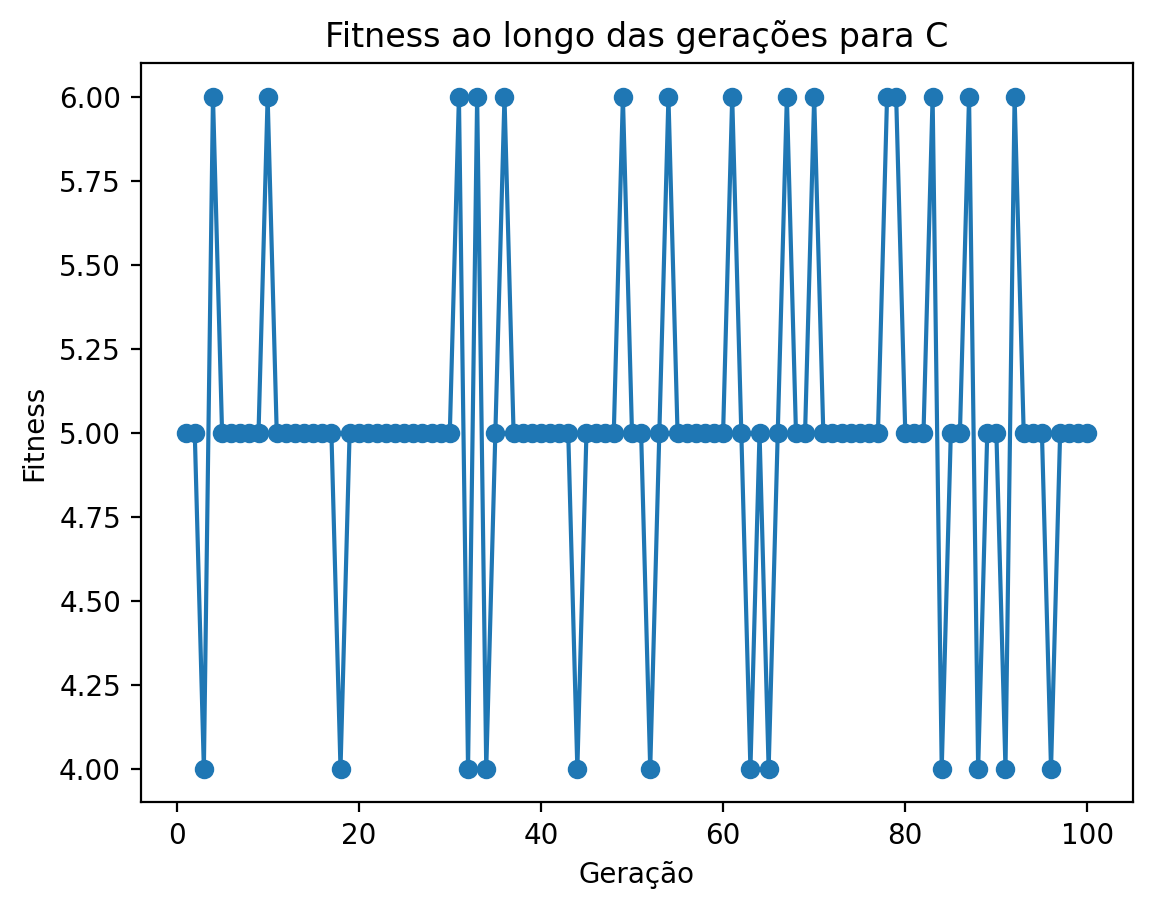

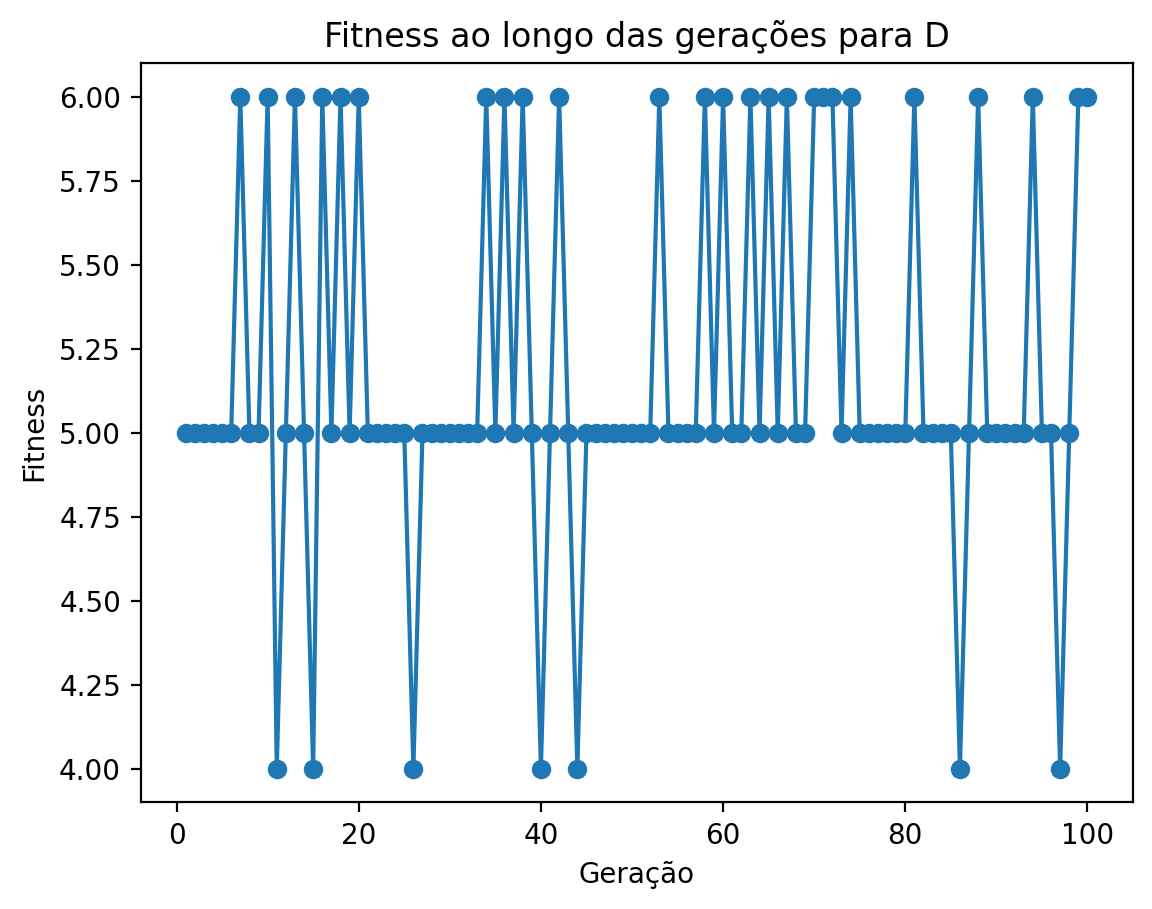

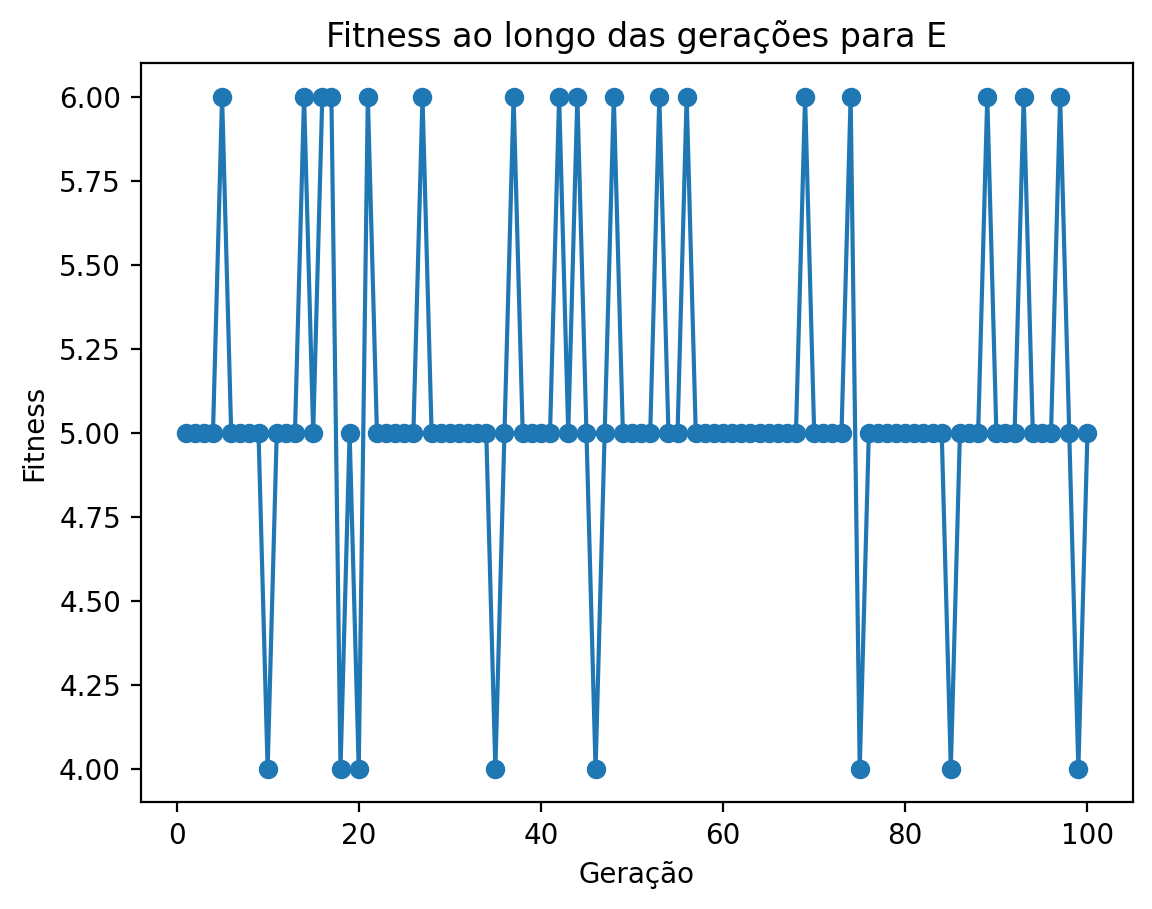

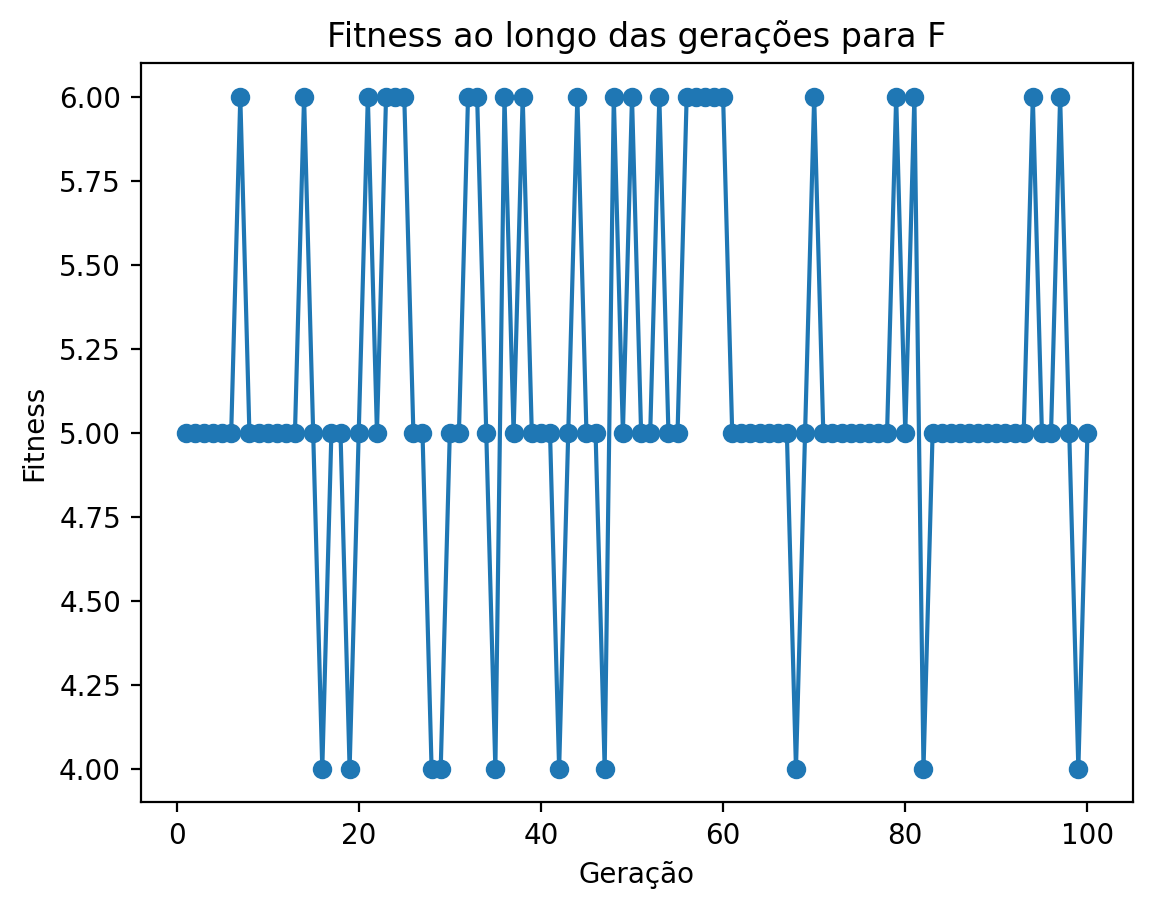

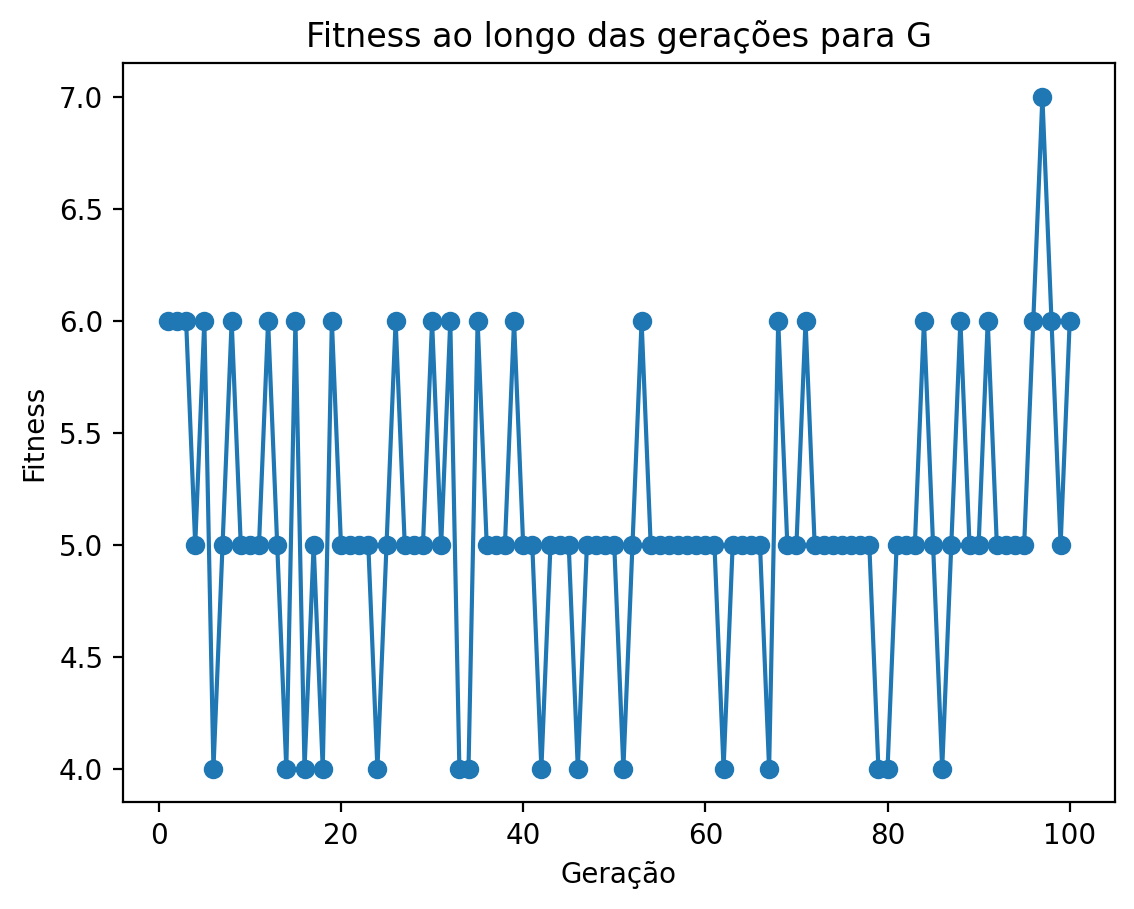

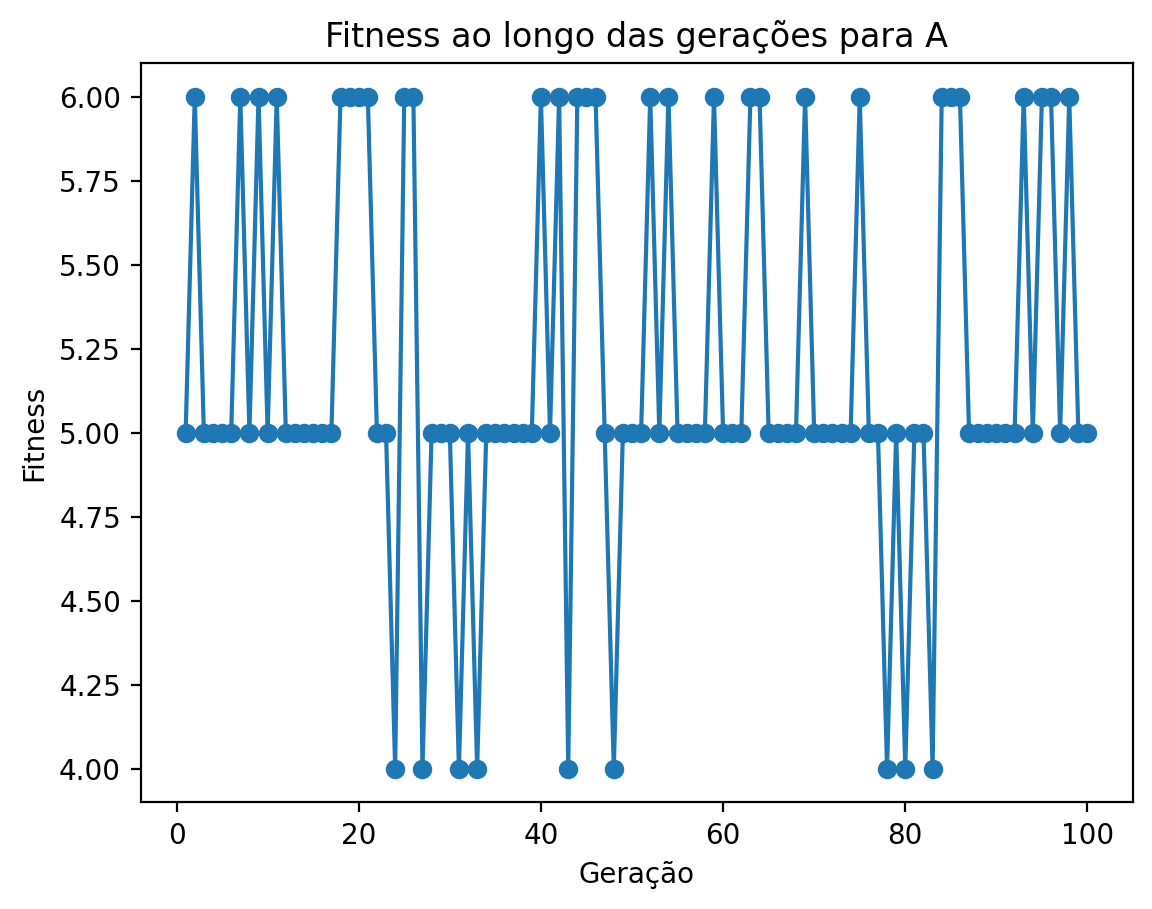

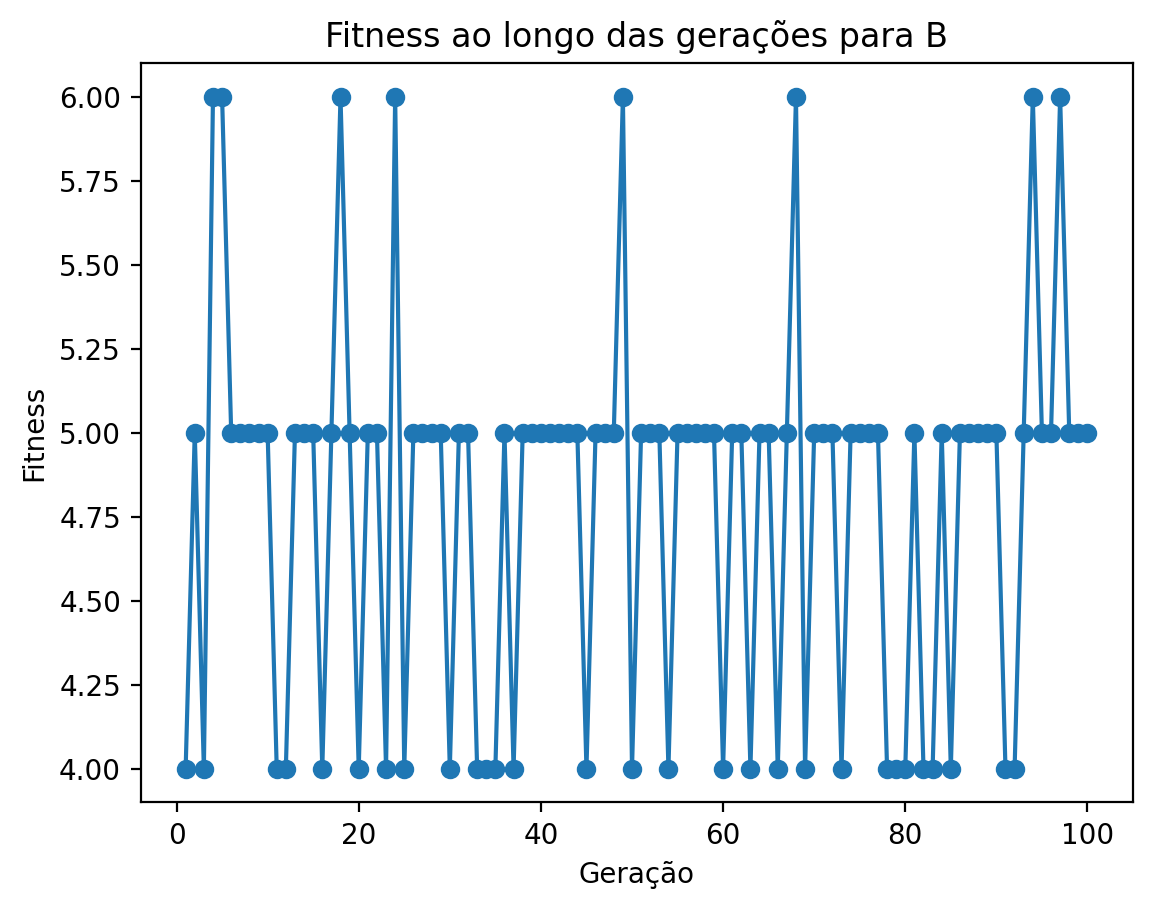

In [ ]:
import random
import matplotlib.pyplot as plt
from music21 import stream, note, chord as music21_chord, midi


chord_mapping = [
    'C', 'D', 'E', 'F', 'G', 'A', 'B', 'Dm', 'Em', 'Gm', 'Am', 'Bm',
    'C#m', 'D#m', 'F#m', 'G#m', 'Bb', 'Bm7(b5)', 'C#m7(b5)', 'D#m7(b5)',
    'Em7(b5)', 'F#m7(b5)', 'G#m7(b5)', 'A#m7(b5)'
]




def generate_random_individual():
    return [random.randint(0, len(chord_mapping) - 1) for _ in range(7)]

def decode_chord_sequence(chord_sequence):
    decoded_chords = []
    for num in chord_sequence:
        if 0 <= num < len(chord_mapping):
            decoded_chords.append(chord_mapping[num])
        else:
            print(f"Aviso: Índice inválido {num} gerado. Utilizando valor padrão.")
            decoded_chords.append(chord_mapping[0])
    return decoded_chords

#para o fitness se ja apareceu um acorde certo no conjunto de acordes, ele nao sera contado 2x
def calculate_fitness(chord_sequence, key):
    decoded_chords = decode_chord_sequence(chord_sequence)
    unique_chords = set(decoded_chords)
    fitness = sum(chord in desired_chords[key] for chord in unique_chords)
    return fitness

def evolutionary_algorithm(key, population_size=20, num_generations=50, mutation_rate=0.1, crossover_rate=0.8):
    population = [generate_random_individual() for _ in range(population_size)]
    fitness_history = []

    best_sequence = None
    best_fitness = 0

    for generation in range(num_generations):
        fitness_scores = [calculate_fitness(individual, key) for individual in population]
        fitness_history.append(max(fitness_scores))

        max_fitness_index = fitness_scores.index(max(fitness_scores))
        if fitness_scores[max_fitness_index] > best_fitness:
            best_fitness = fitness_scores[max_fitness_index]
            best_sequence = population[max_fitness_index]

        parents = random.choices(population, k=2, weights=fitness_scores)
        children = [crossover(parents[0], parents[1], crossover_rate) for _ in range(population_size - 2)]
        mutated_children = [mutate(child, mutation_rate) for child in children]
        population = [parents[0], parents[1]] + mutated_children

    return best_sequence, best_fitness, fitness_history

def crossover(parent1, parent2, crossover_rate):
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, 5)
        child = parent1[:crossover_point] + parent2[crossover_point:]
        return child
    else:
        return parent1

def mutate(individual, mutation_rate):
    mutated_individual = individual.copy()
    for i in range(len(mutated_individual)):
        if random.random() < mutation_rate:
            mutated_individual[i] = random.randint(0, len(chord_mapping) - 1)
    return mutated_individual

# Definir os acordes desejados para cada tom
desired_chords = {
    'C': ['C', 'Dm', 'Em', 'F', 'G', 'Am', 'Bm7(b5)'],
    'D': ['D', 'Em', 'F#m', 'G', 'A', 'Bm', 'C#m7(b5)'],
    'E': ['E', 'F#m', 'G#m', 'A', 'B', 'C#m', 'D#m7(b5)'],
    'F': ['F', 'Gm', 'Am', 'Bb', 'C', 'Dm', 'Em7(b5)'],
    'G': ['G', 'Am', 'Bm', 'C', 'D', 'Em', 'F#m7(b5)'],
    'A': ['A', 'Bm', 'C#m', 'D', 'E', 'F#m', 'G#m7(b5)'],
    'B': ['B', 'C#m', 'D#m', 'E', 'F#', 'G#m', 'A#m7(b5)']
}


from music21 import stream, chord as music21_chord, midi
from pydub import AudioSegment

def generate_music_stream(chord_sequence, key):
    music_stream = stream.Score()
    part = stream.Part()

    for chord_name in chord_sequence:
        chord_notes = create_chord(chord_name)
        part.append(chord_notes)

    music_stream.append(part)
    return music_stream

def create_chord(chord_name):
    root_note = chord_name[0]
    if len(chord_name) > 1 and chord_name[1] == 'm':
        return music21_chord.Chord([root_note, root_note + 'b3', root_note + '5'])
    else:
        return music21_chord.Chord([root_note, root_note + '3', root_note + '5'])

def midi_to_wav(music_stream, wav_file):
    midi_data = midi.translate.music21ObjectToMidiFile(music_stream)
    midi_data.open(wav_file, 'wb')
    midi_data.write()
    midi_data.close()

fitness_histories = {key: [] for key in ['C', 'D', 'E', 'F', 'G', 'A', 'B']}
for _ in range(100):
    for key in ['C', 'D', 'E', 'F', 'G', 'A', 'B']:
        best_individual, best_fitness, fitness_history = evolutionary_algorithm(key)
        best_chord_sequence = decode_chord_sequence(best_individual)

        fitness_histories[key].append(max(fitness_history))

        if best_fitness == 7:
            print(f"Melhor sequência de acordes para {key}: {best_chord_sequence}")
            print(f"Melhor fitness: {best_fitness}")

            music_stream = generate_music_stream(best_chord_sequence, key)
            wav_file = f'best_fitness_7_{key}.wav'
            midi_to_wav(music_stream, wav_file)


def plot_fitness_history_for_key(fitness_histories, key):
    fitness_history = fitness_histories[key]
    plt.plot(range(1, len(fitness_history) + 1), fitness_history, marker='o')
    plt.title(f'Fitness ao longo das gerações para {key}')
    plt.xlabel('Geração')
    plt.ylabel('Fitness')
    plt.show()


for key in ['C', 'D', 'E', 'F', 'G', 'A', 'B']:
    plot_fitness_history_for_key(fitness_histories, key)





